In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.models import load_model
import opticspy
import random
from random import randrange

Using TensorFlow backend.


In [2]:
# Parent Directory for the Test subdirectories
parent_dir = ''

In [3]:
def zernike_gen(batch_size=1,sqr_grid_width=50):
    
    while True:

        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])
        
#         Divide x and y by 49 to normalize between 0 and 1
        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)
        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]
        
#         Divide by 10 to keep numbers near the -1 to 1 range
        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])

        train_input = np.array([np.transpose([x[i], y[i], dx_train[i], dy_train[i]])
                      for i in range(batch_size)])

        yield train_input,train_coeff

In [4]:
def zernike_gen_ones(batch_size=1,sqr_grid_width=50):
    
    while True:

        train_coeff = np.transpose([[random.uniform(-1.,1.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z4 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z5 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])
        
#         Divide x and y by 49 to normalize between 0 and 1
        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)
        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]
        
        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])

        train_input = np.array([np.transpose([x[i], y[i], dx_train[i], dy_train[i]])
                      for i in range(batch_size)])

        yield train_input,train_coeff

In [5]:
def block_gen(min_blk=2,max_blk=10,sqr_grid_width=50):
    x_block_size = randrange(min_blk,max_blk+1) 
    x_block_start = randrange(sqr_grid_width-1-x_block_size) 
    x_block = np.array(range(x_block_start,x_block_start+x_block_size))/float(sqr_grid_width)

    y_block_size = randrange(min_blk,max_blk+1) 
    y_block_start = randrange(sqr_grid_width-1-y_block_size) 
    y_block = np.array(range(y_block_start,y_block_start+y_block_size))/float(sqr_grid_width)
    
    return x_block,y_block

y_mask = lambda y,batch,block: np.isin(y[batch][:,1],block)

x_mask = lambda x,batch,block: np.isin(x[batch][:,0],block)

def zernike_gen_block(batch_size=1,sqr_grid_width=50):
   
    while True:
        
        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])


        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)

        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]

        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])

        train_input = np.array([np.transpose([x[i], y[i], dx_train[i], dy_train[i]])
                            for i in range(batch_size)])

    #     NOTE: every sample in batch has the same block removed with this set up?
    #     Generate random block
        x_block,y_block = block_gen(min_blk=2,max_blk=10,sqr_grid_width=sqr_grid_width)

    #     Remove random block
        for i in range(batch_size):
            train_input[i][(y_mask(train_input,i,y_block)) & (x_mask(train_input,i,x_block))] = 0


        yield train_input,train_coeff

In [6]:
# Create random matrix to add to dx and dy
def add_noise(original,batch_size=1,mu=0,sigma=.01):
    noise = [[random.gauss(mu, sigma) for x in range(len(original[0]))] for i in range(batch_size)]
    mod_data = original + noise
    return np.array(mod_data)

def zernike_gen_noise(batch_size=1,sqr_grid_width=50):
    
    while True:
        
        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])

        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)
        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]

        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dx_noise = add_noise(dx_train,batch_size=batch_size)

        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])
        dy_noise = add_noise(dy_train,batch_size=batch_size)

        train_input = np.array([np.transpose([x[i], y[i], dx_noise[i], dy_noise[i]])
                      for i in range(batch_size)])

        yield train_input,train_coeff

In [7]:
# Create random matrix to add to dx and dy and block region
def zernike_gen_blocknoise(batch_size=1,sqr_grid_width=50):
    
    while True:
        
        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])

        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)
        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]

        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dx_noise = add_noise(dx_train,batch_size=batch_size)

        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])
        dy_noise = add_noise(dy_train,batch_size=batch_size)

        train_input = np.array([np.transpose([x[i], y[i], dx_noise[i], dy_noise[i]])
                      for i in range(batch_size)])
        
#     NOTE: every sample in batch has the same block removed with this set up?
#     Generate random block
        x_block,y_block = block_gen(min_blk=2,max_blk=10,sqr_grid_width=sqr_grid_width)

#     Remove random block
        for i in range(batch_size):
            train_input[i][(y_mask(train_input,i,y_block)) & (x_mask(train_input,i,x_block))] = 0

        yield train_input,train_coeff

In [10]:
def plot_sep(df,index,col_list=['mae'],label_list=['MAE']):
    num_plots = len(col_list)
    df_new = df.loc[index]
    fig, ax = plt.subplots(1,num_plots,figsize=(8*num_plots, 5.5))
    plt.subplots_adjust(wspace=.25)
    y_lim_mult = 1.3

    x = np.arange(len(index))

    # Define bar width.
    bar_width = 0.6
    
    # Plot for just one item
    if num_plots == 1:
        ax.bar(x, df_new.loc[index,col_list[0]],
                    width=bar_width, label=label_list[0])
        
        # Fix the x-axes.
        ax.set_xticks(x) # + bar_width / num_plots
        ax.set_xticklabels(index)
        
        # Set y-axis
        ax.set_ylim([0,df_new[col_list[0]].max()*y_lim_mult])
        
        # Axis styling.
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(left=False)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True, color='#EAEAEA')
        
        # Add axis and chart labels.
        ax.set_xlabel('Zernicke Coefficient', labelpad=15,fontsize=13)
        ax.set_ylabel(label_list[0], labelpad=15,fontsize=13)
        ax.set_title('Mean Absolute Error per Coefficient', pad=-5,fontsize=14)
        ax.tick_params(labelsize=12)
        
        # Add text for average
        ax.text(7.5,df_new[col_list[0]].max()*.95,
                'Average {}: {:.5f}'.format(label_list[0],df_new[col_list[0]].mean()),
                bbox=dict(facecolor='white', alpha=.5),fontsize=12)
    
    # Plot for multiple items
    else:
        for i in range(num_plots):
            ax[i].bar(x, df_new.loc[index,col_list[i]],
                        width=bar_width, label=label_list[i])

            # Fix the x-axes.
            ax[i].set_xticks(x) # + bar_width / num_plots
            ax[i].set_xticklabels(index)
            
            # Set y-axis
            ax[i].set_ylim([0,df_new[col_list[i]].max()*y_lim_mult])

            # Axis styling.
            ax[i].spines['top'].set_visible(False)
            ax[i].spines['right'].set_visible(False)
            ax[i].spines['left'].set_visible(False)
            ax[i].spines['bottom'].set_color('#DDDDDD')
            ax[i].tick_params(left=False)
            ax[i].xaxis.grid(False)
            ax[i].yaxis.grid(True, color='#EAEAEA') #F4F4F4

            # Add axis and chart labels.
            ax[i].set_xlabel('Zernicke Coefficient', labelpad=15,fontsize=13)
            ax[i].set_ylabel(label_list[i], labelpad=15,fontsize=13)
            ax[i].set_title('Mean Absolute Error per Coefficient', pad=-5,fontsize=14)
            ax[i].tick_params(labelsize=12)
            
            ax[i].text(6,df_new[col_list[i]].max()*1.1,
                'Average {}:\n{:.5f}'.format(label_list[i],df_new[col_list[i]].mean()),
                bbox=dict(facecolor='white', alpha=.75),fontsize=11)

In [11]:
def eval_model_gen(test_num,parent_dir,gen,steps=1000,name_append='',plot=True):
    try:
        os.chdir(parent_dir + '.\\Test_{}{}'.format(test_num,name_append))
        test_model = load_model('model_test_{}.h5'.format(test_num))
    except:
        print('Verify that the Test directory is accurate and model exists.\nNote: Code currently set to run on windows.')
    
    sqrd_loss_sum = np.zeros((1,15))
    abs_error_sum = np.zeros((1,15))
    
    for i in range(steps):
#         NOTE: Batch size for the generator must be 1 for this function
        train_input,actual_coeff = next(gen)
        y_hat = test_model.predict(train_input)

        error = actual_coeff-y_hat
        loss_sqrd = (error)**2
        abs_error = np.absolute(error)
        
        sqrd_loss_sum += loss_sqrd
        abs_error_sum += abs_error
        
    mse = sqrd_loss_sum/steps
    mae = abs_error_sum/steps
    
    index = ['Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8','Z9','Z10','Z11','Z12','Z13','Z14','Z15']
    range_low = [-2,-1,-1,-9,-4,-3,-1,-1,-1,-1,-1,-1,-1,-1,-1]
    range_high = [3,1,1,5,2,3.2,1.4,1,1,1,1,1,1,1,1]
    
    df = pd.DataFrame({'mse':mse[0],'mae':mae[0],'range_low':range_low,'range_high':range_high},index=index)
    df.insert(loc=2, column='mae_percent_of_range', value=(df.mae / (df.range_high - df.range_low)))
    
    if plot == True:
        plot_sep(df,df.index[3:],col_list=['mae','mae_percent_of_range'],
                 label_list=['MAE','MAE - % of Total Range'])
    
    return mse,mae,df

## BASELINE MODEL EVALUATION

### Evaluate Perfect Samples

In [12]:
z_gen = zernike_gen()

W0114 09:33:20.594012  2408 deprecation_wrapper.py:119] From C:\Users\aambr\AppData\Local\Continuum\anaconda3\envs\zern_poly_2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0114 09:33:20.606977  2408 deprecation_wrapper.py:119] From C:\Users\aambr\AppData\Local\Continuum\anaconda3\envs\zern_poly_2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0114 09:33:20.674796  2408 deprecation_wrapper.py:119] From C:\Users\aambr\AppData\Local\Continuum\anaconda3\envs\zern_poly_2\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0114 09:33:20.675793  2408 deprecation_wrapper.py:119] From C:\Users\aambr\AppData\Local\Continuum\anaconda3\envs\zern_poly_2\lib\site-packages\keras\backend\tensorflow_back

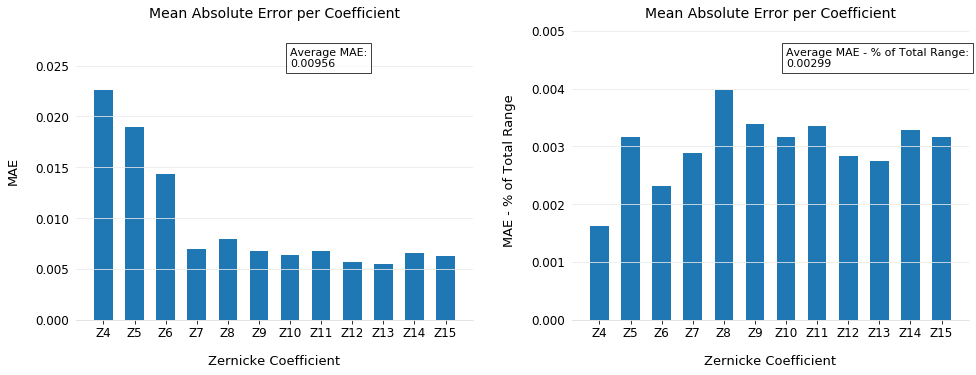

In [13]:
mse_perfect,mae_perfect,df_perfect = eval_model_gen(6,parent_dir,z_gen,steps=1000,name_append='_Perfect')

In [14]:
df_perfect

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.103995,1.264810,0.252962,-2,3.0
Z2,0.000593,0.021428,0.010714,-1,1.0
Z3,0.001306,0.030984,0.015492,-1,1.0
Z4,0.000738,0.022622,0.001616,-9,5.0
Z5,0.000531,0.018960,0.003160,-4,2.0
Z6,0.000318,0.014388,0.002321,-3,3.2
Z7,0.000077,0.006945,0.002894,-1,1.4
Z8,0.000108,0.007960,0.003980,-1,1.0
Z9,0.000080,0.006785,0.003393,-1,1.0
Z10,0.000069,0.006337,0.003168,-1,1.0


In [15]:
print('MSE Mean:',df_perfect.mse.mean())
print('MAE Mean:',df_perfect.mae.mean())
print('MSE (Excluding Z1,Z2,Z3) Mean:',df_perfect.mse[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean:',df_perfect.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_perfect.mae_percent_of_range[3:].mean())

MSE Mean: 0.1405419607996997
MAE Mean: 0.0954664760669214
MSE (Excluding Z1,Z2,Z3) Mean: 0.00018635240211067265
MAE (Excluding Z1,Z2,Z3) Mean: 0.00956464387338575
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.0029933595476419154


### Evaluate Blocked Region Samples

In [16]:
z_gen_block = zernike_gen_block()

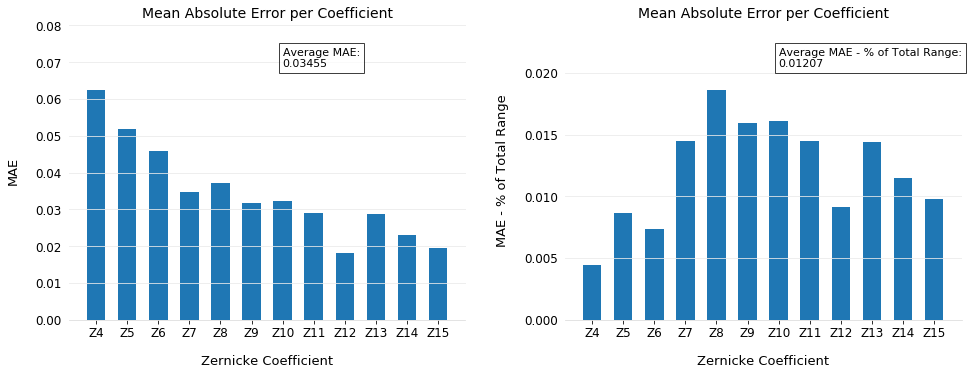

In [17]:
mse_block,mae_block,df_block = eval_model_gen(6,parent_dir,z_gen_block,steps=1000,name_append='_Perfect')

In [18]:
df_block

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.163608,1.288890,0.257778,-2,3.0
Z2,0.016921,0.089222,0.044611,-1,1.0
Z3,0.019786,0.097317,0.048658,-1,1.0
Z4,0.009735,0.062504,0.004465,-9,5.0
Z5,0.006064,0.051797,0.008633,-4,2.0
Z6,0.004630,0.045806,0.007388,-3,3.2
Z7,0.003224,0.034720,0.014467,-1,1.4
Z8,0.003905,0.037256,0.018628,-1,1.0
Z9,0.002475,0.031822,0.015911,-1,1.0
Z10,0.002463,0.032251,0.016126,-1,1.0


In [19]:
print('MSE Mean:',df_block.mse.mean())
print('MAE Mean:',df_block.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_block.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_block.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_block.mae_percent_of_range[3:].mean())

MSE Mean: 0.1493431702055694
MAE Mean: 0.12600399582902735
MSE Mean (Excluding Z1,Z2,Z3): 0.003319372530325307
MAE Mean (Excluding Z1,Z2,Z3): 0.03455260648021329
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.012071203059067765


### Evaluate Noisy Samples

In [20]:
z_gen_noise = zernike_gen_noise()

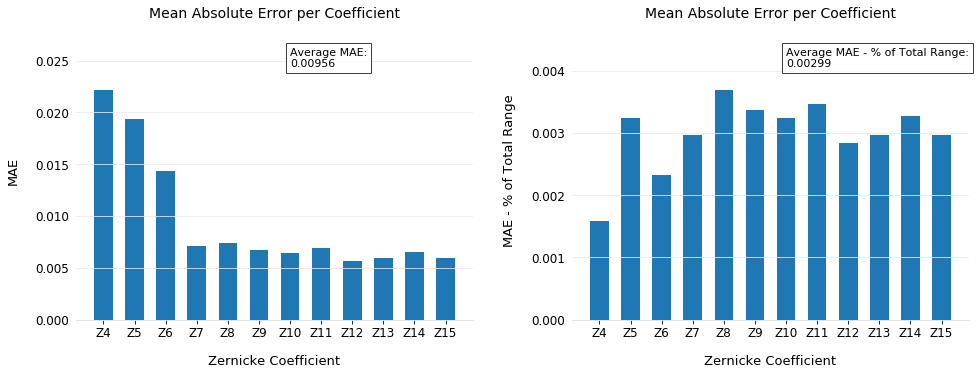

In [21]:
mse_noise,mae_noise,df_noise = eval_model_gen(6,parent_dir,z_gen_noise,steps=1000,name_append='_Perfect')

In [22]:
df_noise

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.108392,1.261813,0.252363,-2,3.0
Z2,0.000624,0.022079,0.011039,-1,1.0
Z3,0.001349,0.031449,0.015724,-1,1.0
Z4,0.000726,0.022176,0.001584,-9,5.0
Z5,0.000550,0.019394,0.003232,-4,2.0
Z6,0.000316,0.014375,0.002319,-3,3.2
Z7,0.000082,0.007116,0.002965,-1,1.4
Z8,0.000093,0.007382,0.003691,-1,1.0
Z9,0.000077,0.006728,0.003364,-1,1.0
Z10,0.000070,0.006488,0.003244,-1,1.0


In [23]:
print('MSE Mean:',df_noise.mse.mean())
print('MAE Mean:',df_noise.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_noise.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_noise.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_noise.mae_percent_of_range[3:].mean())

MSE Mean: 0.14083992829142514
MAE Mean: 0.09533447252577634
MSE Mean (Excluding Z1,Z2,Z3): 0.00018619458612239236
MAE Mean (Excluding Z1,Z2,Z3): 0.009556340964718158
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.0029922590345408686


### Evaluate Noisy Blocked Region Samples

In [24]:
z_gen_blocknoise = zernike_gen_blocknoise()

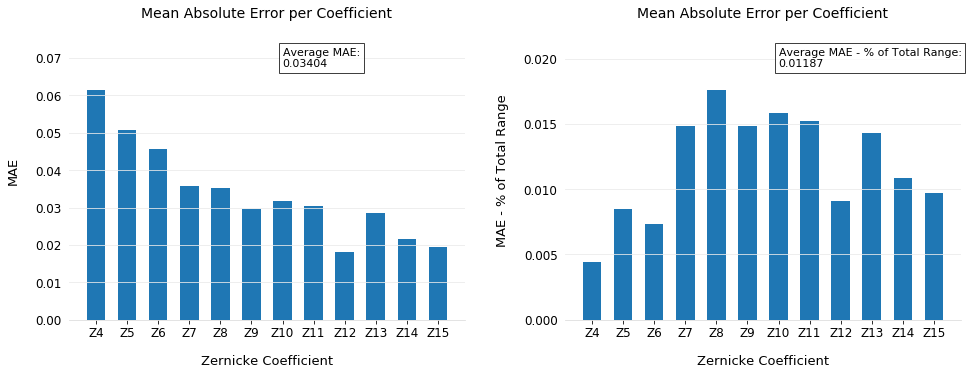

In [25]:
mse_blocknoise,mae_blocknoise,df_blocknoise = eval_model_gen(6,parent_dir,z_gen_blocknoise,steps=1000,name_append='_Perfect')

In [26]:
df_blocknoise

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.128889,1.271151,0.254230,-2,3.0
Z2,0.016603,0.090065,0.045032,-1,1.0
Z3,0.019113,0.097738,0.048869,-1,1.0
Z4,0.008654,0.061515,0.004394,-9,5.0
Z5,0.005898,0.050891,0.008482,-4,2.0
Z6,0.004214,0.045629,0.007360,-3,3.2
Z7,0.003346,0.035657,0.014857,-1,1.4
Z8,0.002926,0.035219,0.017609,-1,1.0
Z9,0.002045,0.029740,0.014870,-1,1.0
Z10,0.002402,0.031670,0.015835,-1,1.0


In [27]:
print('MSE Mean:',df_blocknoise.mse.mean())
print('MAE Mean:',df_blocknoise.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_blocknoise.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_blocknoise.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_blocknoise.mae_percent_of_range[3:].mean())

MSE Mean: 0.14672887945682314
MAE Mean: 0.12449595036607475
MSE Mean (Excluding Z1,Z2,Z3): 0.003027409400965363
MAE Mean (Excluding Z1,Z2,Z3): 0.03404044848488542
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.011874078683977544


In [28]:
# Baseline model

# Perfect data loss and mae
baseline_sample_type = ['Perfect','Blocked Region','Noisy','Blocked and Noisy']
baseline_mse = [df_perfect.mse[3:].mean(),df_block.mse[3:].mean(),df_noise.mse[3:].mean(),
                df_blocknoise.mse[3:].mean()]
baseline_mae = [df_perfect.mae[3:].mean(),df_block.mae[3:].mean(),df_noise.mae[3:].mean(),
                df_blocknoise.mae[3:].mean()]
baseline_mae_perc = [df_perfect.mae_percent_of_range[3:].mean(),df_block.mae_percent_of_range[3:].mean(),
                    df_noise.mae_percent_of_range[3:].mean(),df_blocknoise.mae_percent_of_range[3:].mean()]
baseline_df = pd.DataFrame({'loss':baseline_mse,'mae':baseline_mae,
                            'mae_perc':baseline_mae_perc},index=baseline_sample_type)

In [29]:
baseline_df.to_clipboard()

## BLOCKED AND NOISY MODEL EVALUATION (Continued Training)

### Evaluate Perfect Samples

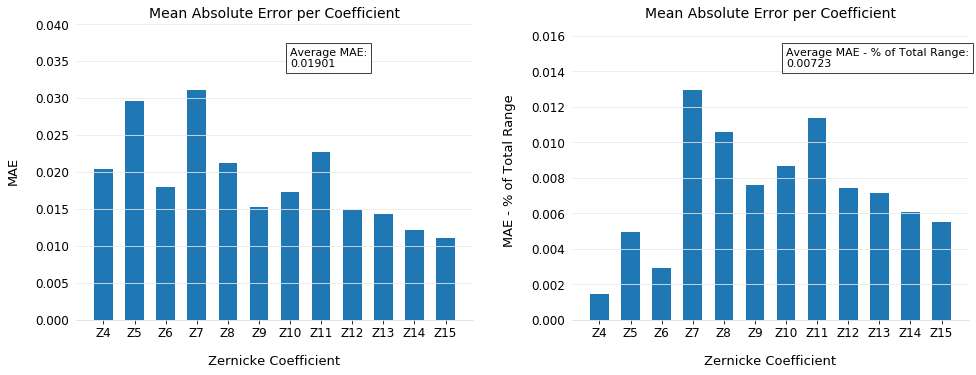

In [30]:
mse_perfect2,mae_perfect2,df_perfect2 = eval_model_gen(6,parent_dir,z_gen,steps=1000,name_append='_BlockNoise')

In [31]:
df_perfect2

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.119442,1.249673,0.249935,-2,3.0
Z2,0.002921,0.043745,0.021873,-1,1.0
Z3,0.015212,0.115161,0.057581,-1,1.0
Z4,0.000685,0.020445,0.001460,-9,5.0
Z5,0.001370,0.029664,0.004944,-4,2.0
Z6,0.000527,0.018017,0.002906,-3,3.2
Z7,0.001518,0.031117,0.012965,-1,1.4
Z8,0.000716,0.021213,0.010607,-1,1.0
Z9,0.000386,0.015215,0.007608,-1,1.0
Z10,0.000512,0.017340,0.008670,-1,1.0


In [32]:
print('MSE Mean:',df_perfect2.mse.mean())
print('MAE Mean:',df_perfect2.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_perfect2.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_perfect2.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_perfect2.mae_percent_of_range[3:].mean())

MSE Mean: 0.14301867432279589
MAE Mean: 0.1091169151390283
MSE Mean (Excluding Z1,Z2,Z3): 0.0006421681922814101
MAE Mean (Excluding Z1,Z2,Z3): 0.019014539678385796
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.007228437686160902


### Evaluate Blocked Region Samples

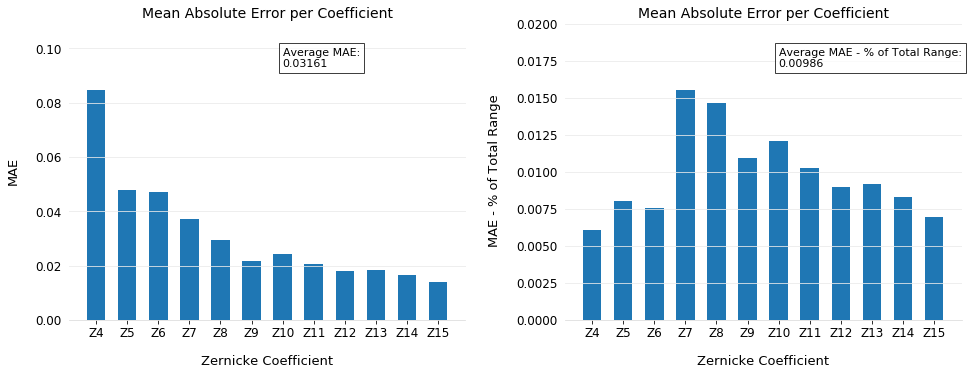

In [33]:
mse_block2,mae_block2,df_block2 = eval_model_gen(6,parent_dir,z_gen_block,steps=1000,name_append='_BlockNoise')

In [34]:
df_block2

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.089997,1.250656,0.250131,-2,3.0
Z2,0.010516,0.076636,0.038318,-1,1.0
Z3,0.024382,0.132689,0.066345,-1,1.0
Z4,0.014593,0.084759,0.006054,-9,5.0
Z5,0.004236,0.047932,0.007989,-4,2.0
Z6,0.004210,0.046952,0.007573,-3,3.2
Z7,0.002285,0.037263,0.015526,-1,1.4
Z8,0.001502,0.029310,0.014655,-1,1.0
Z9,0.001062,0.021853,0.010927,-1,1.0
Z10,0.001084,0.024166,0.012083,-1,1.0


In [35]:
print('MSE Mean:',df_block2.mse.mean())
print('MAE Mean:',df_block2.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_block2.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_block2.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_block2.mae_percent_of_range[3:].mean())

MSE Mean: 0.14377652791767553
MAE Mean: 0.12262344755611994
MSE Mean (Excluding Z1,Z2,Z3): 0.0026460204226636005
MAE Mean (Excluding Z1,Z2,Z3): 0.03161415925989134
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.009864536367349545


### Evaluate Noisy Samples

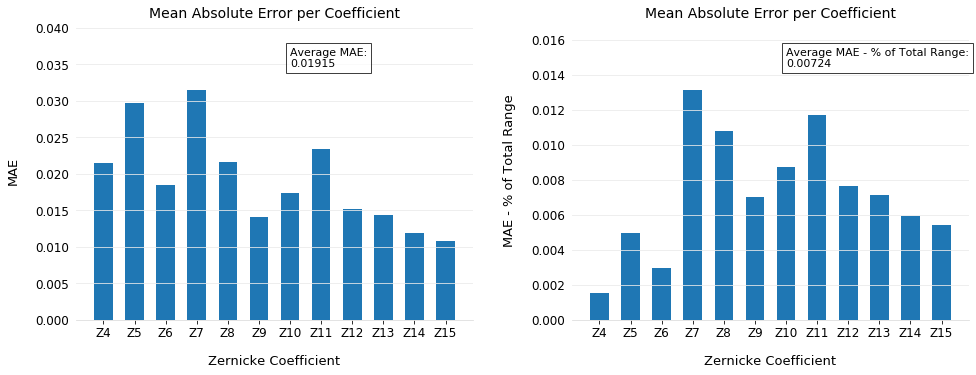

In [36]:
mse_noise2,mae_noise2,df_noise2 = eval_model_gen(6,parent_dir,z_gen_noise,steps=1000,name_append='_BlockNoise')

In [37]:
df_noise2

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.102370,1.247444,0.249489,-2,3.0
Z2,0.003090,0.044180,0.022090,-1,1.0
Z3,0.015824,0.118147,0.059073,-1,1.0
Z4,0.000741,0.021510,0.001536,-9,5.0
Z5,0.001364,0.029665,0.004944,-4,2.0
Z6,0.000553,0.018499,0.002984,-3,3.2
Z7,0.001458,0.031509,0.013129,-1,1.4
Z8,0.000743,0.021610,0.010805,-1,1.0
Z9,0.000323,0.014036,0.007018,-1,1.0
Z10,0.000526,0.017435,0.008718,-1,1.0


In [38]:
print('MSE Mean:',df_noise2.mse.mean())
print('MAE Mean:',df_noise2.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_noise2.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_noise2.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_noise2.mae_percent_of_range[3:].mean())

MSE Mean: 0.14193199130588643
MAE Mean: 0.10930737710522026
MSE Mean (Excluding Z1,Z2,Z3): 0.0006412850784523809
MAE Mean (Excluding Z1,Z2,Z3): 0.019153369845496915
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.007243478575688204


### Evaluate Noisy Blocked Region Samples

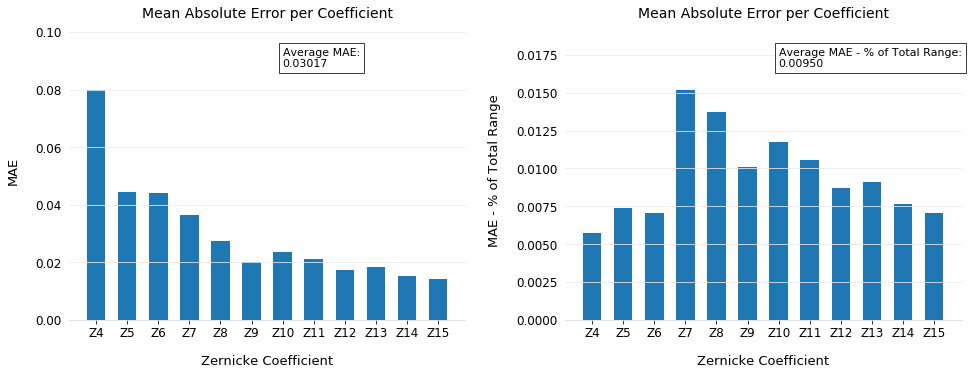

In [39]:
mse_blocknoise2,mae_blocknoise2,df_blocknoise2 = eval_model_gen(6,parent_dir,z_gen_blocknoise,
                                                                steps=1000,name_append='_BlockNoise')

In [40]:
df_blocknoise2

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.043953,1.237794,0.247559,-2,3.0
Z2,0.009283,0.072475,0.036238,-1,1.0
Z3,0.024467,0.134472,0.067236,-1,1.0
Z4,0.011924,0.079936,0.005710,-9,5.0
Z5,0.003593,0.044447,0.007408,-4,2.0
Z6,0.003732,0.043911,0.007082,-3,3.2
Z7,0.002141,0.036468,0.015195,-1,1.4
Z8,0.001292,0.027465,0.013732,-1,1.0
Z9,0.000823,0.020248,0.010124,-1,1.0
Z10,0.001026,0.023500,0.011750,-1,1.0


In [41]:
print('MSE Mean:',df_blocknoise2.mse.mean())
print('MAE Mean:',df_blocknoise2.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_blocknoise2.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_blocknoise2.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_blocknoise2.mae_percent_of_range[3:].mean())

MSE Mean: 0.14032315593818298
MAE Mean: 0.12044888373039643
MSE Mean (Excluding Z1,Z2,Z3): 0.0022619830865110153
MAE Mean (Excluding Z1,Z2,Z3): 0.030166029406126445
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.009500849357995124


In [42]:
# Blocked and Noisy model - Trained starting with perfect model

# Data loss and mae
bn_cont_sample_type = ['Perfect','Blocked Region','Noisy','Blocked and Noisy']
bn_cont_mse = [df_perfect2.mse[3:].mean(),df_block2.mse[3:].mean(),df_noise2.mse[3:].mean(),
                df_blocknoise2.mse[3:].mean()]
bn_cont_mae = [df_perfect2.mae[3:].mean(),df_block2.mae[3:].mean(),df_noise2.mae[3:].mean(),
                df_blocknoise2.mae[3:].mean()]
bn_cont_mae_perc = [df_perfect2.mae_percent_of_range[3:].mean(),df_block2.mae_percent_of_range[3:].mean(),
                    df_noise2.mae_percent_of_range[3:].mean(),df_blocknoise2.mae_percent_of_range[3:].mean()]
bn_cont_df = pd.DataFrame({'loss':bn_cont_mse,'mae':bn_cont_mae,
                            'mae_perc':bn_cont_mae_perc},index=bn_cont_sample_type)

In [59]:
# bn_cont_df.to_clipboard()

## BLOCKED AND NOISY MODEL EVALUATION (Trained With Random Weight Initialization)

### Evaluate Perfect Samples

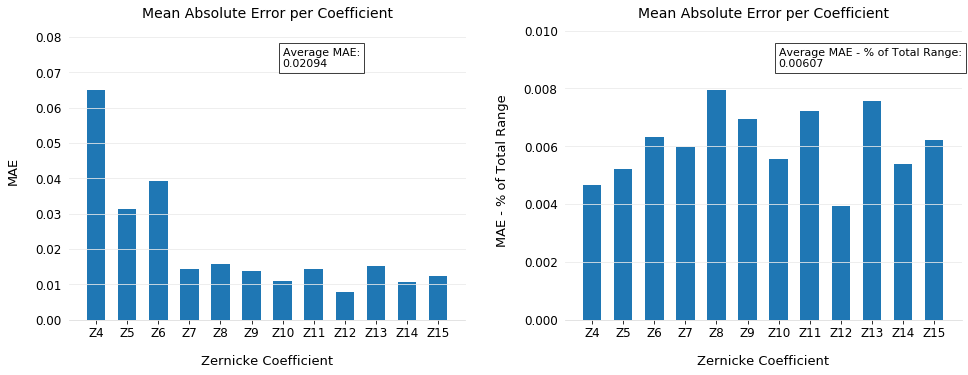

In [44]:
mse_perfect3,mae_perfect3,df_perfect3 = eval_model_gen(6,parent_dir,z_gen,steps=1000,name_append='_scratch_blocknoise')

In [45]:
df_perfect3

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.083335,1.250159,0.250032,-2,3.0
Z2,0.002999,0.043129,0.021564,-1,1.0
Z3,0.004571,0.054923,0.027462,-1,1.0
Z4,0.006318,0.065016,0.004644,-9,5.0
Z5,0.001378,0.031238,0.005206,-4,2.0
Z6,0.002329,0.039229,0.006327,-3,3.2
Z7,0.000365,0.014308,0.005962,-1,1.4
Z8,0.000410,0.015899,0.007950,-1,1.0
Z9,0.000324,0.013889,0.006945,-1,1.0
Z10,0.000208,0.011107,0.005553,-1,1.0


In [46]:
print('MSE Mean:',df_perfect3.mse.mean())
print('MAE Mean:',df_perfect3.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_perfect3.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_perfect3.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_perfect3.mae_percent_of_range[3:].mean())

MSE Mean: 0.14023269499450391
MAE Mean: 0.10663260222974066
MSE Mean (Excluding Z1,Z2,Z3): 0.0010488502086563498
MAE Mean (Excluding Z1,Z2,Z3): 0.02093986898712473
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.006073569864147754


### Evaluate Blocked Region Samples

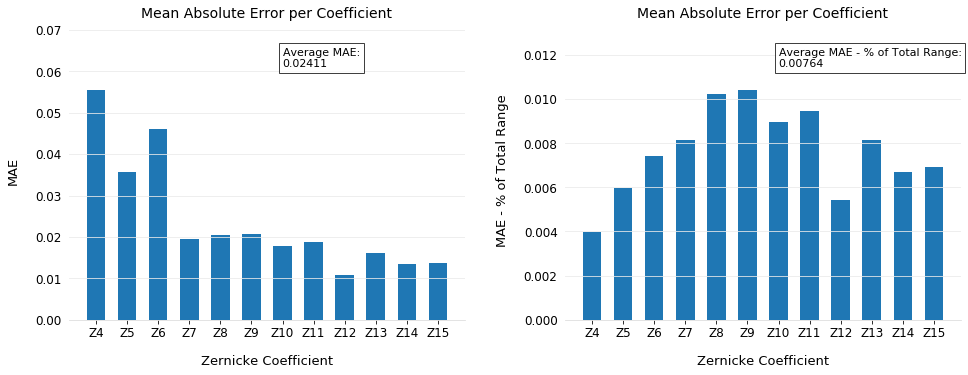

In [47]:
mse_block3,mae_block3,df_block3 = eval_model_gen(6,parent_dir,z_gen_block,steps=1000,name_append='_scratch_blocknoise')

In [48]:
df_block3

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.046897,1.235881,0.247176,-2,3.0
Z2,0.008914,0.070267,0.035133,-1,1.0
Z3,0.013455,0.087869,0.043935,-1,1.0
Z4,0.005473,0.055517,0.003966,-9,5.0
Z5,0.002362,0.035767,0.005961,-4,2.0
Z6,0.003556,0.046075,0.007431,-3,3.2
Z7,0.000754,0.019573,0.008156,-1,1.4
Z8,0.000794,0.020494,0.010247,-1,1.0
Z9,0.000901,0.020831,0.010415,-1,1.0
Z10,0.000640,0.017872,0.008936,-1,1.0


In [49]:
print('MSE Mean:',df_block3.mse.mean())
print('MAE Mean:',df_block3.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_block3.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_block3.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_block3.mae_percent_of_range[3:].mean())

MSE Mean: 0.13904785970490405
MAE Mean: 0.11221943619911157
MSE Mean (Excluding Z1,Z2,Z3): 0.001370983171412718
MAE Mean (Excluding Z1,Z2,Z3): 0.02410625989034186
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.0076404319243325


### Evaluate Noisy Samples

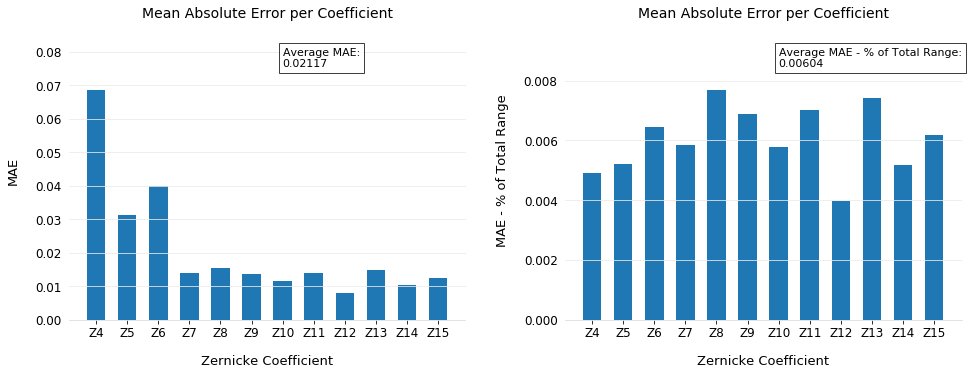

In [50]:
mse_noise3,mae_noise3,df_noise3 = eval_model_gen(6,parent_dir,z_gen_noise,steps=1000,name_append='_scratch_blocknoise')

In [51]:
df_noise3

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.120809,1.265804,0.253161,-2,3.0
Z2,0.003084,0.044272,0.022136,-1,1.0
Z3,0.004286,0.054075,0.027037,-1,1.0
Z4,0.007028,0.068654,0.004904,-9,5.0
Z5,0.001383,0.031300,0.005217,-4,2.0
Z6,0.002377,0.039872,0.006431,-3,3.2
Z7,0.000322,0.014017,0.005841,-1,1.4
Z8,0.000382,0.015381,0.007691,-1,1.0
Z9,0.000323,0.013768,0.006884,-1,1.0
Z10,0.000228,0.011527,0.005764,-1,1.0


In [52]:
print('MSE Mean:',df_noise3.mse.mean())
print('MAE Mean:',df_noise3.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_noise3.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_noise3.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_noise3.mae_percent_of_range[3:].mean())

MSE Mean: 0.14276137406087724
MAE Mean: 0.10788282801441436
MSE Mean (Excluding Z1,Z2,Z3): 0.0011034446957598235
MAE Mean (Excluding Z1,Z2,Z3): 0.021174372394712194
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.006043069495990622


### Evaluate Noisy Blocked Region Samples

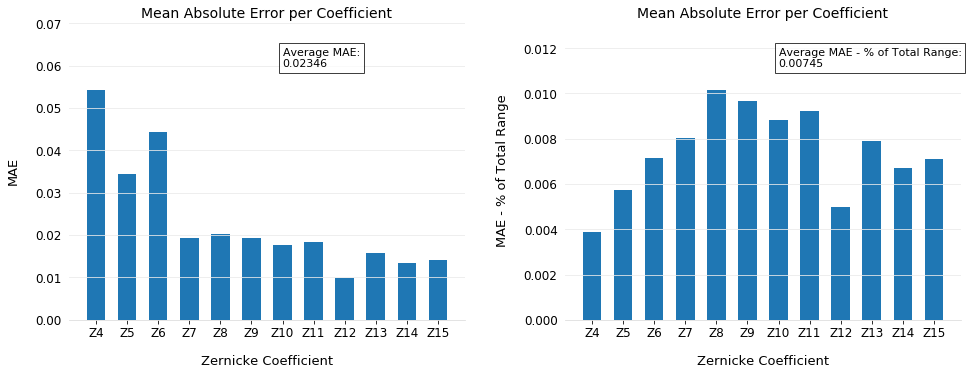

In [53]:
mse_blocknoise3,mae_blocknoise3,df_blocknoise3 = eval_model_gen(6,parent_dir,z_gen_blocknoise,steps=1000,
                                                          name_append='_scratch_blocknoise')

In [54]:
df_blocknoise3

,mse,mae,mae_percent_of_range,range_low,range_high
Z1,2.211455,1.302991,0.260598,-2,3.0
Z2,0.008476,0.068272,0.034136,-1,1.0
Z3,0.012390,0.083499,0.041750,-1,1.0
Z4,0.005329,0.054317,0.003880,-9,5.0
Z5,0.002212,0.034437,0.005739,-4,2.0
Z6,0.003219,0.044337,0.007151,-3,3.2
Z7,0.000763,0.019239,0.008016,-1,1.4
Z8,0.000780,0.020325,0.010162,-1,1.0
Z9,0.000783,0.019330,0.009665,-1,1.0
Z10,0.000741,0.017630,0.008815,-1,1.0


In [55]:
print('MSE Mean:',df_blocknoise3.mse.mean())
print('MAE Mean:',df_blocknoise3.mae.mean())
print('MSE Mean (Excluding Z1,Z2,Z3):',df_blocknoise3.mse[3:].mean())
print('MAE Mean (Excluding Z1,Z2,Z3):',df_blocknoise3.mae[3:].mean())
print('MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range):',df_blocknoise3.mae_percent_of_range[3:].mean())

MSE Mean: 0.14987119462526224
MAE Mean: 0.11575053009136477
MSE Mean (Excluding Z1,Z2,Z3): 0.0013122068983956244
MAE Mean (Excluding Z1,Z2,Z3): 0.0234579684296892
MAE (Excluding Z1,Z2,Z3) Mean (as % of Total Range): 0.0074474608507768035


In [56]:
# Blocked and Noisy model - Trained with random weight initialization

# Data loss and mae
bn_rand_sample_type = ['Perfect','Blocked Region','Noisy','Blocked and Noisy']
bn_rand_mse = [df_perfect3.mse[3:].mean(),df_block3.mse[3:].mean(),df_noise3.mse[3:].mean(),
                df_blocknoise3.mse[3:].mean()]
bn_rand_mae = [df_perfect3.mae[3:].mean(),df_block3.mae[3:].mean(),df_noise3.mae[3:].mean(),
                df_blocknoise3.mae[3:].mean()]
bn_rand_mae_perc = [df_perfect3.mae_percent_of_range[3:].mean(),df_block3.mae_percent_of_range[3:].mean(),
                    df_noise3.mae_percent_of_range[3:].mean(),df_blocknoise3.mae_percent_of_range[3:].mean()]
bn_rand_df = pd.DataFrame({'loss':bn_rand_mse,'mae':bn_rand_mae,
                            'mae_perc':bn_rand_mae_perc},index=bn_rand_sample_type)

In [60]:
# bn_rand_df.to_clipboard()

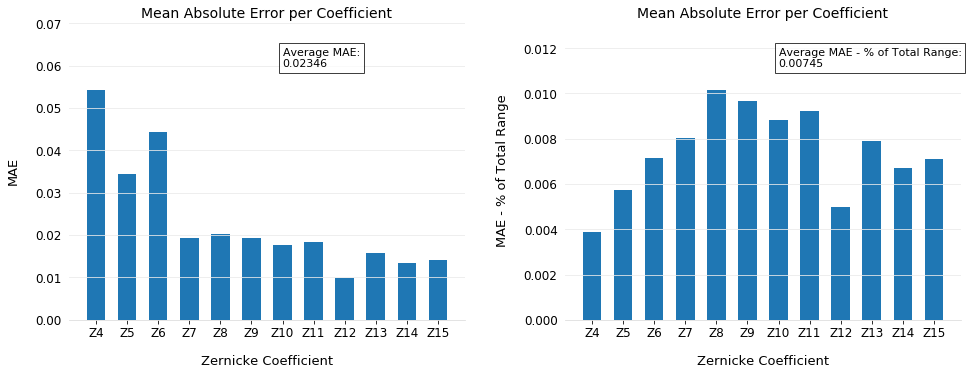

In [58]:
plot_sep(df_blocknoise3,df_blocknoise3.index[3:],col_list=['mae','mae_percent_of_range'],
                 label_list=['MAE','MAE - % of Total Range'])